In [1]:
import os
from PIL import Image, ImageEnhance
import random

# Veri seti ana dizini
base_dir = "/kaggle/input/eski-veri-seti-snf-karm"

# Minimum sayıya ulaşmak için hedef değer
target_count = None

# 1️⃣ Sınıflardaki görsel sayılarını say
class_counts = {}
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    if os.path.isdir(class_path):
        img_count = len([img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_dir] = img_count

# Sonuçları yazdır ve minimum değeri belirle
print("\n📊 Sınıflardaki Görsel Sayıları:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} görsel")
target_count = min(class_counts.values()) if class_counts else 0

# 2️⃣ Dengesizlik tespiti ve augmentasyon
def augment_image(img_path, save_path):
    with Image.open(img_path) as img:
        # Renk iyileştirme
        enhancer = ImageEnhance.Color(img)
        img = enhancer.enhance(random.uniform(0.5, 1.5))
        # Döndürme
        img = img.rotate(random.choice([0, 90, 180, 270]))
        # Ayna yansıması
        if random.choice([True, False]):
            img = img.transpose(Image.FLIP_LEFT_RIGHT)
        # Kaydet
        img.save(save_path)

# 3️⃣ Azınlık sınıfları artır
for class_dir, count in class_counts.items():
    class_path = os.path.join(base_dir, class_dir)
    # Eksik görsel sayısını hesapla
    missing = target_count - count
    if missing > 0:
        print(f"\n🔄 '{class_dir}' için {missing} yeni görsel üretiliyor...")
        existing_images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
        
        for i in range(missing):
            img_name = random.choice(existing_images)
            img_path = os.path.join(class_path, img_name)
            new_img_name = f"aug_{i}_{img_name}"
            new_img_path = os.path.join(class_path, new_img_name)
            augment_image(img_path, new_img_path)
        print(f"✅ {class_dir} dengelendi!")

print("\n🎯 Veri seti dengelendi ve augmentasyon tamamlandı!")



📊 Sınıflardaki Görsel Sayıları:
N: 2873 görsel
H: 128 görsel
M: 232 görsel
G: 284 görsel
A: 266 görsel
O: 708 görsel
C: 293 görsel
D: 1608 görsel

🎯 Veri seti dengelendi ve augmentasyon tamamlandı!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


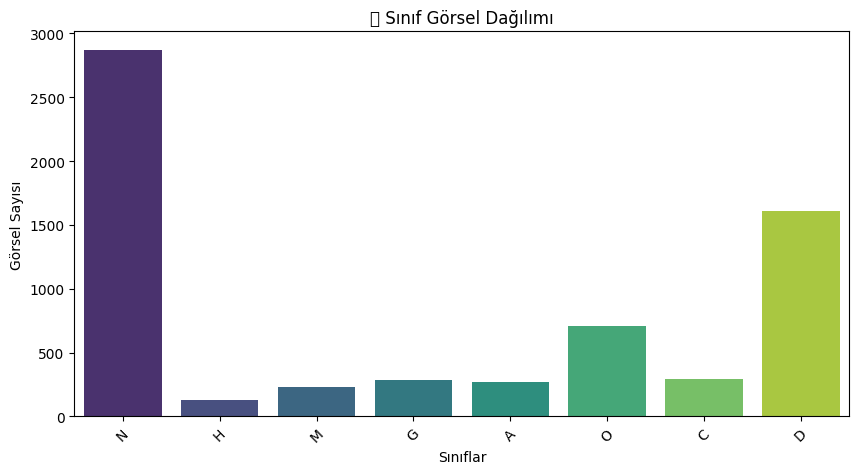

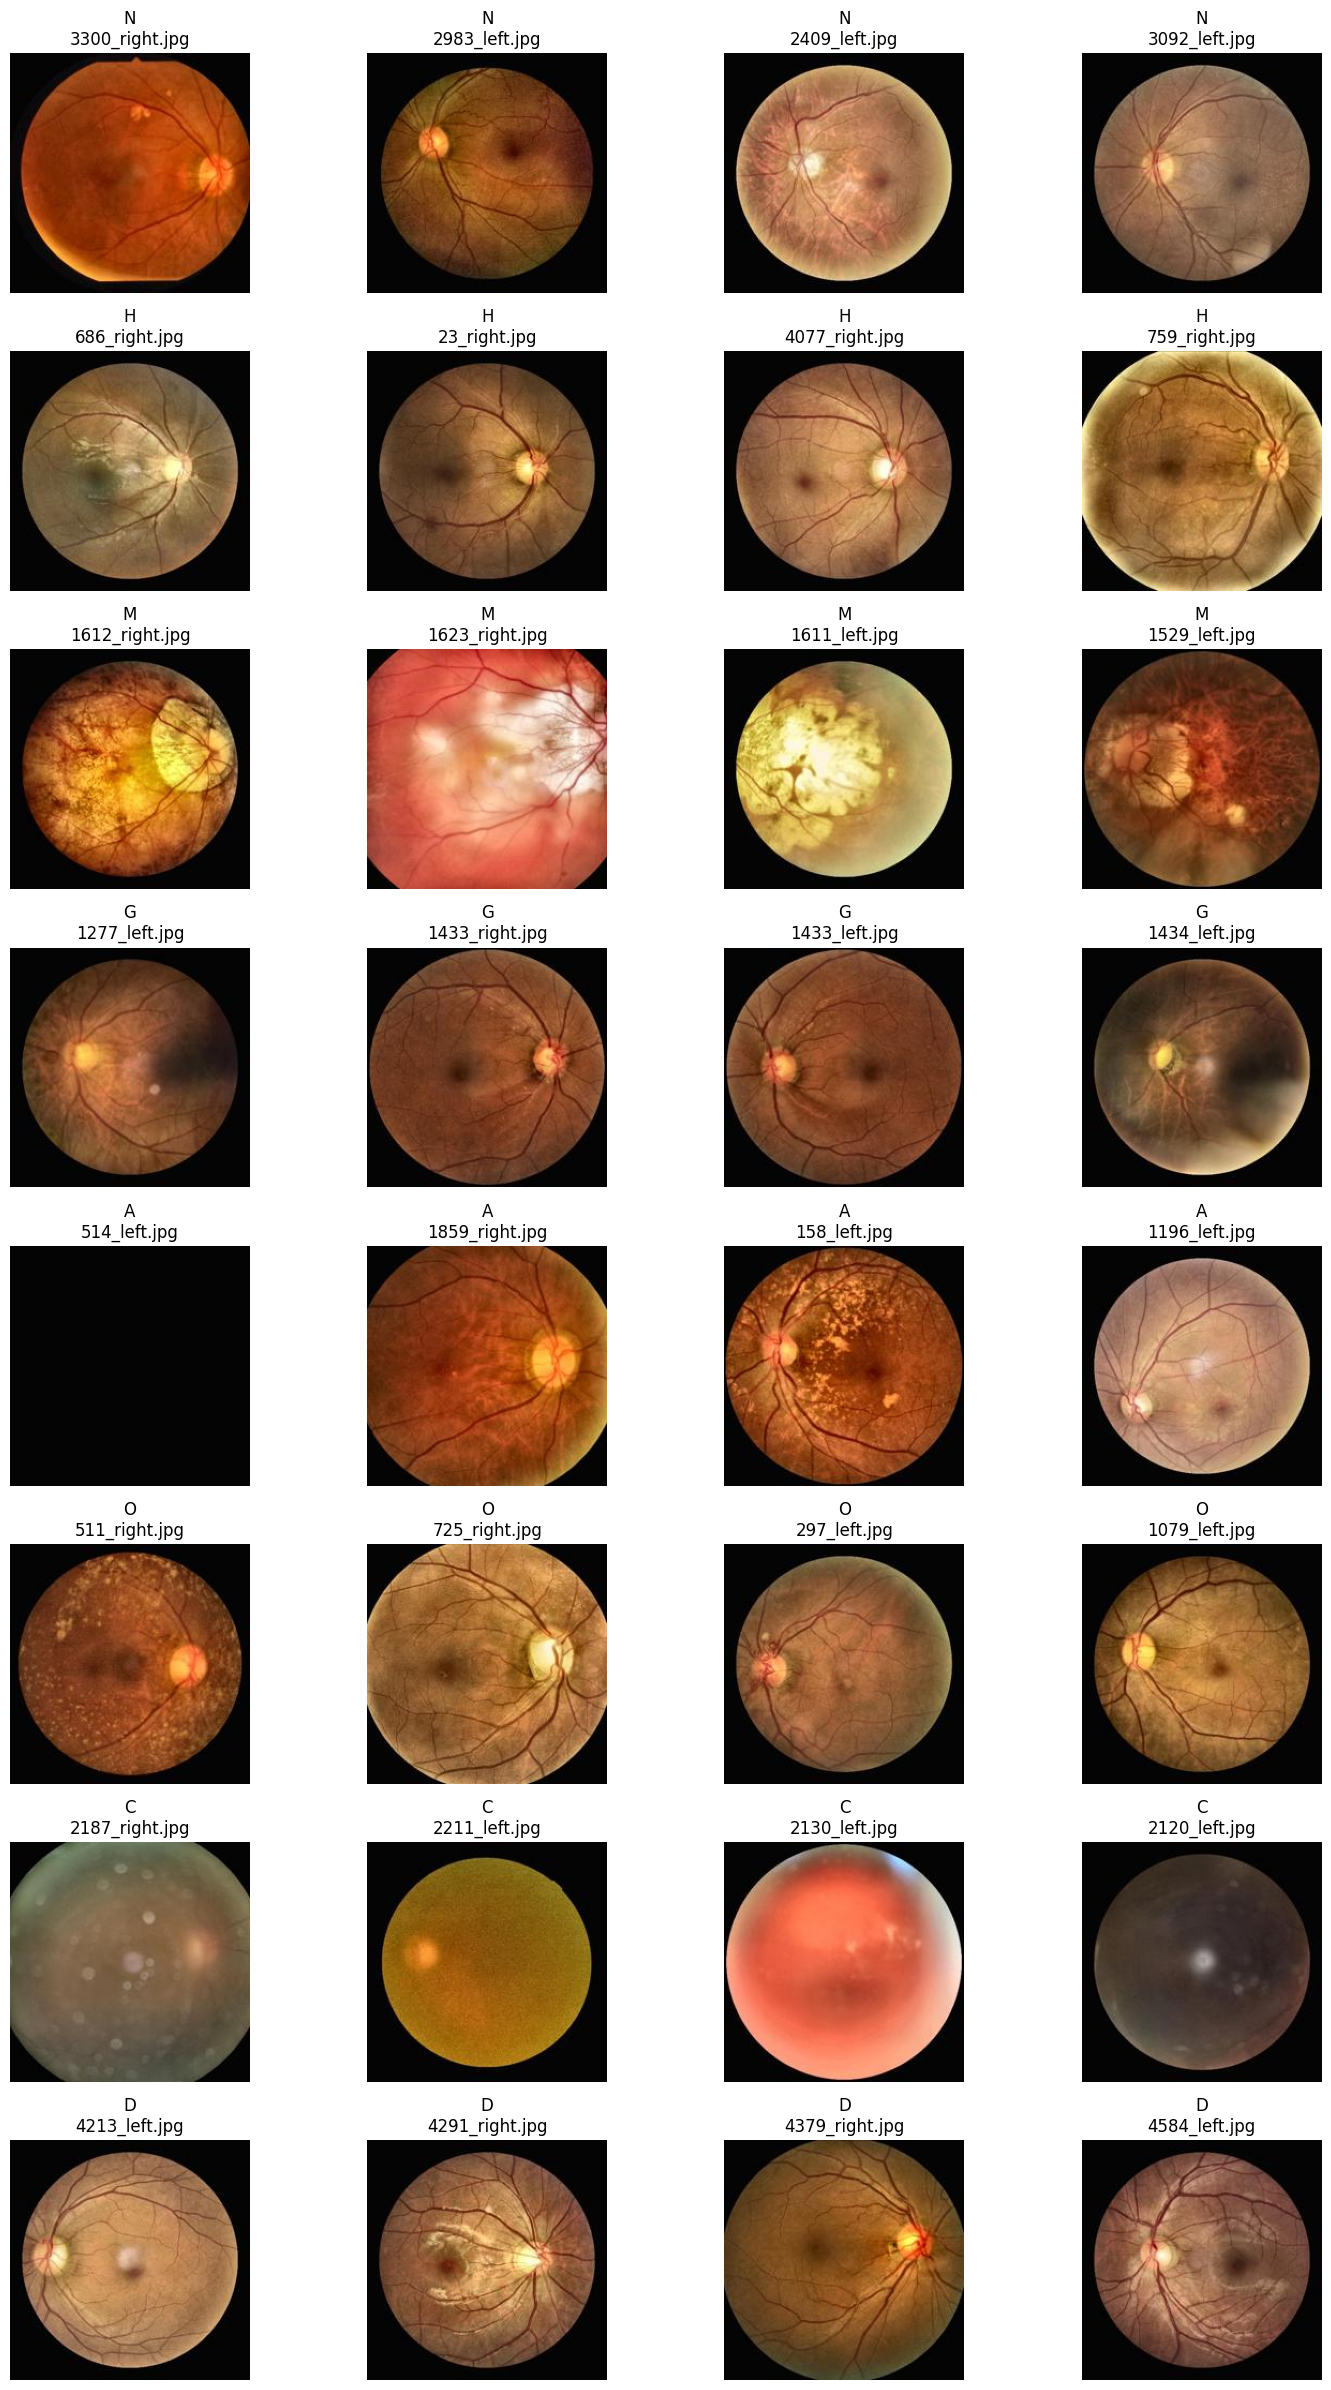


📊 Sınıf Dağılımı:
N: 2873 görsel
H: 128 görsel
M: 232 görsel
G: 284 görsel
A: 266 görsel
O: 708 görsel
C: 293 görsel
D: 1608 görsel

⚖️ Maksimum Görsel Sayısı: 2873
⚖️ Minimum Görsel Sayısı: 128

⚠️ Veri setinde dengesizlik olabilir. Augmentasyon ayarlarını kontrol edin.


In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns
from collections import Counter


# 1️⃣ Sınıf Dağılımını Görselleştir
class_counts = {class_name: len(os.listdir(os.path.join(base_dir, class_name)))
                for class_name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, class_name))}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("🔍 Sınıf Görsel Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Görsel Sayısı")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Her Sınıftan Rastgele 4 Görsel Göster
fig, axes = plt.subplots(len(class_counts), 4, figsize=(15, len(class_counts) * 3))

for i, (class_name, count) in enumerate(class_counts.items()):
    class_path = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
    random_images = random.sample(images, min(len(images), 4))

    for j, img_name in enumerate(random_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"{class_name}\n{img_name}")
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

# 3️⃣ Verileri Analiz Et
print("\n📊 Sınıf Dağılımı:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} görsel")

max_count = max(class_counts.values())
min_count = min(class_counts.values())
print(f"\n⚖️ Maksimum Görsel Sayısı: {max_count}")
print(f"⚖️ Minimum Görsel Sayısı: {min_count}")

# 4️⃣ Dengeli mi kontrol et
if max_count == min_count:
    print("\n✅ Veri seti dengeli!")
else:
    print("\n⚠️ Veri setinde dengesizlik olabilir. Augmentasyon ayarlarını kontrol edin.")



✅ Veri artırma tamamlandı!


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


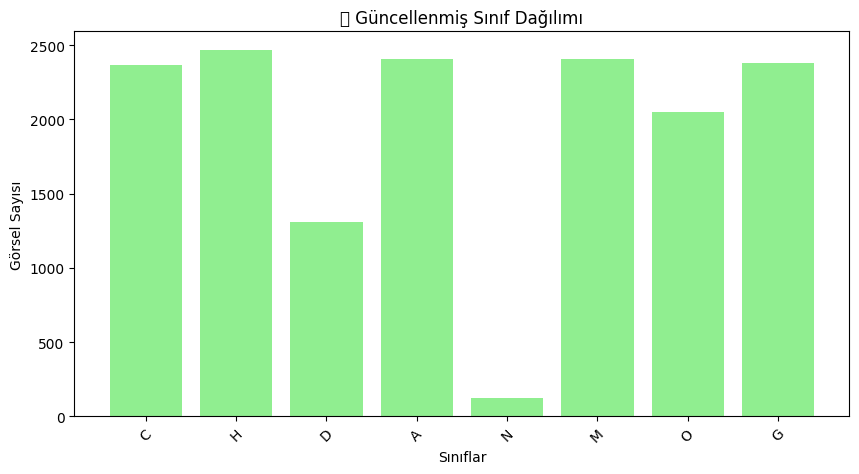

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import random
import numpy as np
import matplotlib.pyplot as plt

# Veri artırma ayarları
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Klasörleri kontrol et ve oluştur
output_dir = "/kaggle/working/augmented_images"
os.makedirs(output_dir, exist_ok=True)

# Hedef sınıf başına görsel sayısı
target_count = 3000

# Veri artırma işlemi
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Çıktı için yeni klasör oluştur
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    # Mevcut görselleri al
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
    current_count = len(images)

    # Veri artırma
    while current_count < target_count:
        img_name = random.choice(images)
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        img_array = img_to_array(img).reshape((1,) + img.size[::-1] + (3,))

        # Görsel artırma ve kaydetme
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=class_output_path, save_prefix="aug", save_format="jpg"):
            current_count += 1
            if current_count >= target_count:
                break

print("\n✅ Veri artırma tamamlandı!")

# Yeni dağılımı kontrol et
class_counts = {cls: len(os.listdir(os.path.join(output_dir, cls))) for cls in os.listdir(output_dir)}
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='lightgreen')
plt.title("📊 Güncellenmiş Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Görsel Sayısı")
plt.xticks(rotation=45)
plt.show()


In [4]:
import os
import shutil

# Kaynak klasörler
old_dataset = "/kaggle/input/eski-veri-seti-snf-karm"
new_dataset = "/kaggle/working/augmented_images"

# Hedef klasör
merged_dataset = "/kaggle/working/merged_dataset"
os.makedirs(merged_dataset, exist_ok=True)

# Sınıfları birleştir
for class_name in os.listdir(old_dataset):
    old_class_path = os.path.join(old_dataset, class_name)
    new_class_path = os.path.join(new_dataset, class_name)
    merged_class_path = os.path.join(merged_dataset, class_name)

    # Klasör oluştur
    os.makedirs(merged_class_path, exist_ok=True)

    # Eski veri setini kopyala
    if os.path.exists(old_class_path):
        for file in os.listdir(old_class_path):
            src = os.path.join(old_class_path, file)
            dst = os.path.join(merged_class_path, file)
            shutil.copy2(src, dst)

    # Yeni veri setini kopyala
    if os.path.exists(new_class_path):
        for file in os.listdir(new_class_path):
            src = os.path.join(new_class_path, file)
            dst = os.path.join(merged_class_path, file)
            shutil.copy2(src, dst)

print("\n✅ Veri setleri başarıyla birleştirildi!")

# Son dağılımı kontrol et
class_counts



✅ Veri setleri başarıyla birleştirildi!


{'C': 2365,
 'H': 2470,
 'D': 1308,
 'A': 2409,
 'N': 126,
 'M': 2408,
 'O': 2047,
 'G': 2383}

In [6]:
import os
import torch
import numpy as np
from PIL import Image
import functools
import torch.nn as nn
import torch.nn.functional as F

# Residual Dense Block (RDB)
class ResidualDenseBlock_5C(nn.Module):
    def __init__(self, nf=64, gc=32, bias=True):
        super(ResidualDenseBlock_5C, self).__init__()
        self.conv1 = nn.Conv2d(nf, gc, 3, 1, 1, bias=bias)
        self.conv2 = nn.Conv2d(nf + gc, gc, 3, 1, 1, bias=bias)
        self.conv3 = nn.Conv2d(nf + 2 * gc, gc, 3, 1, 1, bias=bias)
        self.conv4 = nn.Conv2d(nf + 3 * gc, gc, 3, 1, 1, bias=bias)
        self.conv5 = nn.Conv2d(nf + 4 * gc, nf, 3, 1, 1, bias=bias)
        self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

    def forward(self, x):
        x1 = self.lrelu(self.conv1(x))
        x2 = self.lrelu(self.conv2(torch.cat((x, x1), 1)))
        x3 = self.lrelu(self.conv3(torch.cat((x, x1, x2), 1)))
        x4 = self.lrelu(self.conv4(torch.cat((x, x1, x2, x3), 1)))
        x5 = self.conv5(torch.cat((x, x1, x2, x3, x4), 1))
        return x5 * 0.2 + x

# RRDB bloğu
class RRDB(nn.Module):
    def __init__(self, nf, gc=32):
        super(RRDB, self).__init__()
        self.RDB1 = ResidualDenseBlock_5C(nf, gc)
        self.RDB2 = ResidualDenseBlock_5C(nf, gc)
        self.RDB3 = ResidualDenseBlock_5C(nf, gc)

    def forward(self, x):
        out = self.RDB1(x)
        out = self.RDB2(out)
        out = self.RDB3(out)
        return out * 0.2 + x

# RRDB katmanları oluşturma
def make_layer(block, n_layers):
    layers = []
    for _ in range(n_layers):
        layers.append(block())
    return nn.Sequential(*layers)

# ESRGAN model mimarisi (RRDBNet)
class RRDBNet(nn.Module):
    def __init__(self, in_nc=3, out_nc=3, nf=64, nb=23, gc=32):
        super(RRDBNet, self).__init__()
        RRDB_block_f = functools.partial(RRDB, nf=nf, gc=gc)

        self.conv_first = nn.Conv2d(in_nc, nf, 3, 1, 1, bias=True)
        self.RRDB_trunk = make_layer(RRDB_block_f, nb)
        self.trunk_conv = nn.Conv2d(nf, nf, 3, 1, 1, bias=True)
        #### upsampling
        self.upconv1 = nn.Conv2d(nf, nf, 3, 1, 1, bias=True)
        self.upconv2 = nn.Conv2d(nf, nf, 3, 1, 1, bias=True)
        self.HRconv = nn.Conv2d(nf, nf, 3, 1, 1, bias=True)
        self.conv_last = nn.Conv2d(nf, out_nc, 3, 1, 1, bias=True)

        self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

    def forward(self, x):
        fea = self.conv_first(x)
        trunk = self.trunk_conv(self.RRDB_trunk(fea))
        fea = fea + trunk

        fea = self.lrelu(self.upconv1(F.interpolate(fea, scale_factor=2, mode='nearest')))
        fea = self.lrelu(self.upconv2(F.interpolate(fea, scale_factor=2, mode='nearest')))
        out = self.conv_last(self.lrelu(self.HRconv(fea)))

        return out

# ESRGAN modelini yükleme
def load_esrgan_model(model_path, device):
    model = RRDBNet(in_nc=3, out_nc=3, nf=64, nb=23)  # Model mimarisini oluştur
    state_dict = torch.load(model_path, map_location=device)  # Ağırlıkları yükle
    model.load_state_dict(state_dict)  # Ağırlıkları modele yükle
    model.to(device)  # Modeli GPU'ya taşı
    model.eval()  # Modeli eval moduna al
    return model

# Görüntüyü yükleme ve ön işleme
def preprocess_image(image_path, device):
    img = Image.open(image_path).convert('RGB')
    
    # Görüntüyü 512x512 boyutuna yeniden boyutlandır
    img = img.resize((512, 512), Image.BICUBIC)
    
    img = np.array(img)
    img = img.astype(np.float32) / 255.0  # Normalize et
    img = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0)  # PyTorch tensor formatına çevir
    img = img.to(device)  # Görüntüyü GPU'ya taşı
    return img

# Görüntüyü ESRGAN ile iyileştirme
def enhance_image_with_esrgan(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
    return output.squeeze(0).permute(1, 2, 0).clamp(0, 1).cpu().numpy()  # Çıktıyı CPU'ya taşı

# Görüntüyü kaydetme ve 224x224 boyutuna yeniden boyutlandırma
def save_image(image_numpy, output_path):
    image_numpy = (image_numpy * 255.0).astype(np.uint8)
    image = Image.fromarray(image_numpy)
    image = image.resize((224, 224), Image.BICUBIC)  # Görüntüyü 224x224 boyutuna yeniden boyutlandır
    image.save(output_path)

# Tüm klasörleri işleme
def process_dataset(input_root, output_root, model, device):
    # Çıktı klasörünü oluştur
    os.makedirs(output_root, exist_ok=True)

    # Tüm klasörleri ve dosyaları gez
    for root, dirs, files in os.walk(input_root):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                # Giriş ve çıkış yollarını belirle
                input_image_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_root)
                output_folder = os.path.join(output_root, relative_path)
                os.makedirs(output_folder, exist_ok=True)
                output_image_path = os.path.join(output_folder, file)

                # Görüntüyü yükle ve işle
                image_tensor = preprocess_image(input_image_path, device)
                enhanced_image = enhance_image_with_esrgan(model, image_tensor)

                # İyileştirilmiş görüntüyü kaydet
                save_image(enhanced_image, output_image_path)
                print(f"İşlenen görüntü: {input_image_path} -> {output_image_path}")

# Örnek kullanım
def main():
    # GPU kullanılabilir mi kontrol et
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Kullanılan cihaz: {device}")

    # Model yolunu ve veri seti yollarını belirtin
    model_path = '/kaggle/input/rrdb_esrgan_x4.pth/pytorch/default/1/RRDB_ESRGAN_x4.pth'  # Önceden eğitilmiş ESRGAN modeli
    input_root = '/kaggle/working/merged_dataset'  # Giriş veri seti kök klasörü
    output_root = '/kaggle/working/output_dataset'  # Çıkış veri seti kök klasörü

    # Modeli yükle
    model = load_esrgan_model(model_path, device)

    # Veri setini işle
    process_dataset(input_root, output_root, model, device)
    print("Tüm görüntüler işlendi ve kaydedildi.")

if __name__ == '__main__':
    main()

Kullanılan cihaz: cuda


<ipython-input-6-a1d85b83b775>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=device)  # Ağırlıkları yükle


İşlenen görüntü: /kaggle/working/merged_dataset/C/2144_right.jpg -> /kaggle/working/output_dataset/C/2144_right.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/aug_0_7809.jpg -> /kaggle/working/output_dataset/C/aug_0_7809.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/aug_0_8695.jpg -> /kaggle/working/output_dataset/C/aug_0_8695.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/aug_0_8531.jpg -> /kaggle/working/output_dataset/C/aug_0_8531.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/aug_0_6824.jpg -> /kaggle/working/output_dataset/C/aug_0_6824.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/aug_0_4702.jpg -> /kaggle/working/output_dataset/C/aug_0_4702.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/2241_left.jpg -> /kaggle/working/output_dataset/C/2241_left.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/aug_0_499.jpg -> /kaggle/working/output_dataset/C/aug_0_499.jpg
İşlenen görüntü: /kaggle/working/merged_dataset/C/1164_left.jpg -> /kaggle/w

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


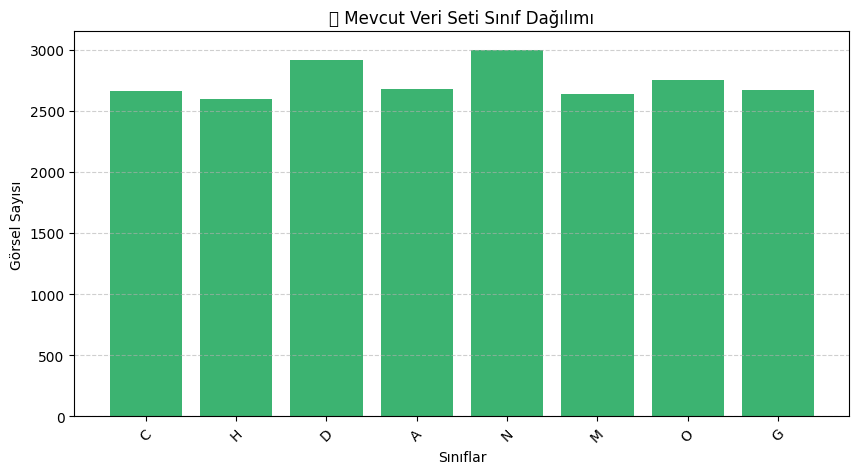

C: 2658 görsel
H: 2598 görsel
D: 2916 görsel
A: 2675 görsel
N: 2999 görsel
M: 2640 görsel
O: 2755 görsel
G: 2667 görsel

✅ Mevcut veri seti başarıyla görselleştirildi.


In [7]:
import os
import matplotlib.pyplot as plt

# Veri seti yolu
dataset_path = "/kaggle/working/output_dataset"

# Sınıf dağılımını almak
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) 
                for class_name in os.listdir(dataset_path)}

# Dağılımı görselleştir
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='mediumseagreen')
plt.title("📊 Mevcut Veri Seti Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Görsel Sayısı")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Sınıf dağılımını yazdır
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} görsel")

print("\n✅ Mevcut veri seti başarıyla görselleştirildi.")


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Ana veri dizini ve hedef dizinleri tanımla
base_dir = "/kaggle/working/output_dataset"
output_dir = "/kaggle/working/split_dataset"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

# Oranları belirle
test_size = 0.2

# Mevcut dizinleri temizle ve yeniden oluştur
for folder in [train_dir, test_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# Her bir sınıfı ayrı ayrı işle
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    
    # Görselleri listele ve train/test olarak ayır
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
    
    # Hedef klasörleri oluştur
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Görselleri ilgili klasörlere taşı
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))

print("✅ Veri başarıyla train/test olarak bölündü.")


✅ Veri başarıyla train/test olarak bölündü.


In [9]:
import shutil

destination_root='/kaggle/working/split_dataset'

# Hedef ZIP dosyasının adı ve konumu
zip_file_name = "/kaggle/working/split_dataset.zip"

# Hedef klasörü ZIP'e sıkıştır
shutil.make_archive(base_name=zip_file_name.replace('.zip', ''), 
                    format='zip', 
                    root_dir=destination_root)

print(f"ZIP file created at: {zip_file_name}")

ZIP file created at: /kaggle/working/split_dataset.zip
